In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
prm = []
prmd = []
        
f = open("../../../../../../Data/Proteins/DENV1/PrM/DENV1_Premembrane.txt", "r")
for x in f:
    if "DSS" in x:
        prmd.append(1)
    elif "DHF" in x:
        prmd.append(1)
    elif x[0] == ">":
        prmd.append(0)
    else:
        x = x.replace("\n", "")
        prm.append(x)

In [3]:
# Converting the arrays into DataFrames
prm = pd.DataFrame(prm)

# Attaching the "Disease" label column to the input
prm["Disease"] = prmd

# Renaming the columns
prm = prm.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
print("The combined shape of the given data is:", str(prm.shape))
print("The length of the combined data is:", str(len(prm.index)))
print("Does the combined data have any null value? ->", prm.isnull().values.any())

# Shuffling the data and then taking a peek
prm = prm.sample(frac = 1)
print(prm.head())

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False
                                              Sequence  Disease
559  FHLTTRGGEPHMIVSKQERGKSLLFKTSAGVNMCTLIAMDLGELCE...        0
160  FHLTTRGGEPHMIVSKQERGKSLLFKTSAGVNMCTLIAMDLGELCE...        0
529  FHLTTRGGEPHMIVSKQERGKSLLFKTSVGINMCTLIAMDLGELCE...        0
341  FHLTTRGGEPHMIVSKQERGKSLLFKTSAGVNMCTLIAMDLGELCE...        0
686  FHLTTRGGEPHMIVSKQERGKSLLFKTSAGVNMCTLIAMDLGELCE...        1


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

prm['words'] = prm.apply(lambda x: getKmers(x['Sequence']), axis=1)
prm = prm.drop('Sequence', axis=1)

prm_texts = list(prm['words'])
for item in range(len(prm_texts)):
    prm_texts[item] = ' '.join(prm_texts[item])

In [6]:
# Creating y and printing the shape of it
y = prm.iloc[:, 0].values
print("The shape of y is:", y.shape)

The shape of y is: (999,)


In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(prm_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (999, 731)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_scores = []

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.5667286728672868
The score for number of neighbours = 2 is: 0.5757294729472948
The score for number of neighbours = 3 is: 0.5525563556355636
The score for number of neighbours = 4 is: 0.5775282528252825
The score for number of neighbours = 5 is: 0.5715274527452745
The score for number of neighbours = 6 is: 0.5755383538353834
The score for number of neighbours = 7 is: 0.5695474547454745
The score for number of neighbours = 8 is: 0.5644674467446745
The score for number of neighbours = 9 is: 0.5664167416741674
The score for number of neighbours = 10 is: 0.5714074407440743
The score for number of neighbours = 11 is: 0.5533668366836684
The score for number of neighbours = 12 is: 0.5513769376937694
The score for number of neighbours = 13 is: 0.5343159315931594
The score for number of neighbours = 14 is: 0.5604775477547755
The score for number of neighbours = 15 is: 0.5453462346234624
The score for number of neighbours = 16 is: 0.5734379437943795
T

Length of list 29
Max of list 0.5915086508650865


Text(0, 0.5, 'Cross-validated accuracy')

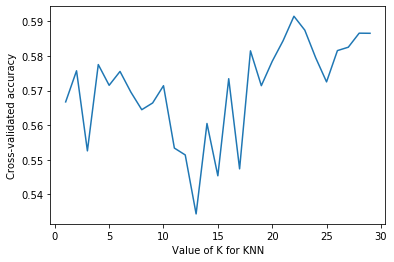

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')